In [3]:
import pandas as pd

df = pd.read_csv("files/msr_except_bugs.csv")

In [4]:
df.shape

(864, 18)

In [5]:
df = df.set_index(['project', 'hash'])

In [6]:
df = df[df['exception_bug']=='S']

In [7]:
df.head(2)

,,author,type,issue_number,commit_msg,author_name,author_date,merge,issue_labels,url_issue,has_buggy,exception_bug,symptom,root-cause,fix pattern,has_smell,has_test in_fix
project,hash,,,,,,,,,,,,,,,,
gensim,a7120d758b555853491e83175f3879a9e2552fcd,1,issue,1751,fix backward compatibility problem in phrases....,Alex Garel,2017-12-06 14:46:12+01:00,False,bug,https://github.com/rare-technologies/gensim/is...,True,S,Aplication Crashing,Error in Logic,Remove the exception handling mechanism,NaN,NaN
edgedb,a4dc14a01b1a2abfe05246d975b6d32cae8b40f2,1,issue,514,"graphql: fix a bug in 'first', 'last', 'after'...",Victor Petrovykh,2019-03-21 14:55:58-04:00,False,"bug,graphql",https://github.com/edgedb/edgedb/issues/514,True,S,Invalid Arguments,Badly defined arguments,Handling error messages for invalid arguments,NaN,NaN


#### Symptoms

In [8]:
df_msr = df

In [9]:
df_msr['symptom_adj'] = df_msr['symptom'].str.strip().str.replace('\n', '')

In [10]:
df_msr[df_msr['symptom_adj'].isna()]

,,author,type,issue_number,commit_msg,author_name,author_date,merge,issue_labels,url_issue,has_buggy,exception_bug,symptom,root-cause,fix pattern,has_smell,has_test in_fix,symptom_adj
project,hash,,,,,,,,,,,,,,,,,
pandas,169a56a33fb7f4fad447e70869599a99832eeee5,5,issue,25308,bug: groupby.agg with reduction function with ...,Matthew Roeschke,2019-02-28 09:38:47-08:00,False,"Bug,Groupby,Timezones",https://github.com/pandas-dev/pandas/issues/25308,True,S,NaN,Unhandled Exception,Add a exception handling block,S,NaN,NaN


In [11]:
df_msr.loc[:, ['symptom','symptom_adj']].drop_duplicates().to_csv("files/symptoms.csv", index=False)

In [12]:
def map_values_from_csv(csv_path, df, column):
    # Load the CSV file into a DataFrame
    mapping_df = pd.read_csv(csv_path)

    map_columns = ['map', 'grp']

    for map_column in map_columns:

        # Create a dictionary from the CSV mapping DataFrame
        mapping_dict = dict(zip(mapping_df['adj'], mapping_df[map_column]))

        # Create a new column in the original DataFrame
        df[f"{column}_{map_column}"] = df[f"{column}_adj"].map(mapping_dict)

        # If the string is not in the mapping, use the original value
        df[column].fillna(df[f"{column}_{map_column}"], inplace=True)

    return df

In [13]:
df_rq1 = map_values_from_csv("files/symptoms_adj.csv", df_msr, "symptom")

df_rq1 = df_rq1.groupby(["symptom_map"]).size().reset_index(name='Count')

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_horizontal_bar(df, category_column, value_column, label_x, label_y, title):
    # Create a horizontal bar plot using Seaborn
    df = df.sort_values(value_column, ascending=False)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

     # Define a custom color palette with light colors
    custom_palette = sns.color_palette("pastel").as_hex()
    
    ax = sns.barplot(x=value_column, y=category_column, data=df) #viridis

    # Add labels and title
    plt.xlabel(label_x, fontsize=10, fontweight='bold')
    plt.ylabel(label_y, fontsize=10, fontweight='bold')
    if title is not None:
        plt.title(title)

    # Increase font size and put labels in bold for both axes
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12) # fontweight='bold')

     # Set explicit tick locations and labels for both axes
    # ax.set_xticks(range(0, 101, 10))
    # ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, fontweight='bold')

    # Add percentage labels on each bar
    for index, value in enumerate(df[value_column]):
        ax.text(value, index, f'{value:.2f}%', ha='left', va='center', color='black', fontweight='bold')


    # Show the plot
    plt.show()

In [15]:
df_rq1

,symptom_map,Count
0,Aplication Crashing,64
1,Compilation Error,3
2,Database Error,1
3,Error in Logic,113
4,Erros in CI,11
5,Exceptional Error,250
6,Incorrect Messaging,44
7,Performance,4
8,UI Componenents not Loaded,1


In [16]:
df_rq1['Percentage'] = (df_rq1['Count'] / len(df_msr)) * 100
df_rq1

,symptom_map,Count,Percentage
0,Aplication Crashing,64,13.034623
1,Compilation Error,3,0.610998
2,Database Error,1,0.203666
3,Error in Logic,113,23.014257
4,Erros in CI,11,2.240326
5,Exceptional Error,250,50.916497
6,Incorrect Messaging,44,8.961303
7,Performance,4,0.814664
8,UI Componenents not Loaded,1,0.203666


In [163]:
df_rq1.to_csv("files/symptoms.csv")

/tmp/ipykernel_1099/3819338574.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)


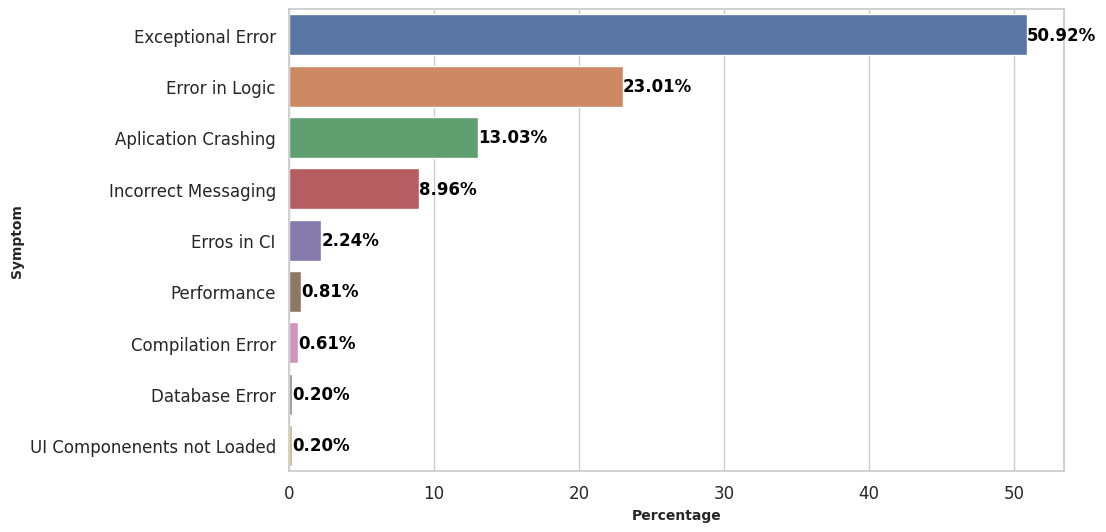

In [17]:
plot_horizontal_bar(df_rq1, category_column='symptom_map', value_column='Percentage', label_x="Percentage", label_y="Symptom", title=None) 

#### Root Causes

In [18]:
df_msr = df_msr.rename(columns={'root-cause': 'root_cause'})

In [19]:
df_msr['root_cause_adj'] = df_msr['root_cause'].str.strip().str.replace('\n', '')

In [20]:
df_msr.loc[:, ['root_cause', 'root_cause_adj']]

,,root_cause,root_cause_adj
project,hash,,
gensim,a7120d758b555853491e83175f3879a9e2552fcd,Error in Logic,Error in Logic
edgedb,a4dc14a01b1a2abfe05246d975b6d32cae8b40f2,Badly defined arguments,Badly defined arguments
pillow,2d06d8550fb8823220d776cb56af98106a9cee51,Unhandled Exception,Unhandled Exception
pandas,eae588d2b20af5ece4e98c35b37252144e6589be,Error in Logic,Error in Logic
pytorch-lightning,c521624a928b2665965830590b2f37b347a86c43,Unhandled Exception,Unhandled Exception
...,...,...,...
lightning,7a48db591e25fa43d372d4092bfc26c66b72df88,Unhandled exception,Unhandled exception
pandas,e8a528d3a2c5d38ae231b96202977bcf23f9fe45,Missing value check,Missing value check
octoprint,147d982c875ff581eb3e9823d0e745e2b2dce4e6,Missing value check,Missing value check


In [21]:
df_msr.root_cause_adj.unique()

array(['Error in Logic', 'Badly defined arguments', 'Unhandled Exception',
       'Missing Raising Condition', 'Re-raising exception',
       'Improper Handling', 'Wrong exception type', 'API Mismatch',
       'Unproper Message Error',
       'Incorrect logic leading to raise a execption',
       'Incorrect code logic', 'Bad Exception Handling Logic',
       'No Exception Handling', 'and Unproper Message Error',
       'Missing exception type', 'Unexpected Raising',
       'Unproper exception handling', 'Aplication Crashing',
       'Error in logic', 'Improper handling',
       'Wrong exception type e Unproper Message Error (Utilizava Generic Exception)',
       'Unproper MessageError Due toUnhandled Exception',
       'Unhandled Error', 'Missing finally',
       'Exception handled incorrectly', 'Wrong Assertion', 'Lib conflict',
       'Additional Unhandled Exception', 'String manipulation issue',
       'Unicode string error', 'Unparsable indent source unhandled',
       'String form

In [22]:
df_msr.loc[:, ['root_cause','root_cause_adj']].drop_duplicates().to_csv("files/root_causes.csv", index=False)

In [23]:
df_rq2 = map_values_from_csv("files/root_causes_adj.csv", df_msr, "root_cause")

In [24]:
df_rq2.head(5)

,,author,type,issue_number,commit_msg,author_name,author_date,merge,issue_labels,url_issue,has_buggy,...,root_cause,fix pattern,has_smell,has_test in_fix,symptom_adj,symptom_map,symptom_grp,root_cause_adj,root_cause_map,root_cause_grp
project,hash,,,,,,,,,,,,,,,,,,,,,
gensim,a7120d758b555853491e83175f3879a9e2552fcd,1,issue,1751,fix backward compatibility problem in phrases....,Alex Garel,2017-12-06 14:46:12+01:00,False,bug,https://github.com/rare-technologies/gensim/is...,True,...,Error in Logic,Remove the exception handling mechanism,NaN,NaN,Aplication Crashing,Aplication Crashing,Aplication Crashing,Error in Logic,Incorrect Logic,Incorrect Logic
edgedb,a4dc14a01b1a2abfe05246d975b6d32cae8b40f2,1,issue,514,"graphql: fix a bug in 'first', 'last', 'after'...",Victor Petrovykh,2019-03-21 14:55:58-04:00,False,"bug,graphql",https://github.com/edgedb/edgedb/issues/514,True,...,Badly defined arguments,Handling error messages for invalid arguments,NaN,NaN,Invalid Arguments,Error in Logic,Error in Logic,Badly defined arguments,Incorrect Logic,Incorrect Logic
pillow,2d06d8550fb8823220d776cb56af98106a9cee51,1,issue,2359,merge pull request #2359 from wiredfool/issue_...,wiredfool,2017-01-26 14:12:32+00:00,True,Bug,https://github.com/python-pillow/pillow/issues...,True,...,Unhandled Exception,Add a exception handling block,NaN,NaN,Exceptional error,Exceptional Error,Exceptional Error,Unhandled Exception,Unhandled Exception,Unhandled Exception
pandas,eae588d2b20af5ece4e98c35b37252144e6589be,1,issue,1778,bug: fix date_range generation issues with dst...,Wes McKinney,2012-08-18 19:35:32-04:00,False,Bug,https://github.com/pandas-dev/pandas/issues/1778,True,...,Error in Logic,mover o tratamento de exceçãopara outro lugar,NaN,NaN,DatetimeIndex error,Exceptional Error,Exceptional Error,Error in Logic,Incorrect Logic,Incorrect Logic
pytorch-lightning,c521624a928b2665965830590b2f37b347a86c43,1,issue,8167,NaN,thomas chaton,2021-06-28 20:26:03+01:00,False,"bug,ready,distributed",https://github.com/pytorchlightning/pytorch-li...,True,...,Unhandled Exception,Add a exception handling block / Raise a excep...,NaN,NaN,Exception trigger,Exceptional Error,Exceptional Error,Unhandled Exception,Unhandled Exception,Unhandled Exception


In [25]:
df_rq2 = df_rq2.groupby(["root_cause_grp"]).size().reset_index(name='Count')

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_horizontal_bar(df, category_column, value_column, label_x, label_y, title):
    # Create a horizontal bar plot using Seaborn
    df = df.sort_values(value_column, ascending=False)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

     # Define a custom color palette with light colors
    custom_palette = sns.color_palette("pastel").as_hex()
    
    ax = sns.barplot(x=value_column, y=category_column, data=df) #viridis

    # Add labels and title
    plt.xlabel(label_x, fontsize=10, fontweight='bold')
    plt.ylabel(label_y, fontsize=10, fontweight='bold')
    if title is not None:
        plt.title(title)

    # Increase font size and put labels in bold for both axes
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12) # fontweight='bold')

     # Set explicit tick locations and labels for both axes
    # ax.set_xticks(range(0, 101, 10))
    # ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, fontweight='bold')

    # Add percentage labels on each bar
    for index, value in enumerate(df[value_column]):
        ax.text(value, index, f'{value:.2f}%', ha='left', va='center', color='black', fontweight='bold')


    # Show the plot
    plt.show()

In [27]:
df_rq2

,root_cause_grp,Count
0,API Misuse,8
1,Improper Exception Handling,11
2,Improper Finally Mechanism,3
3,Improper Handling,104
4,Improper Raising,62
5,Incorrect Logic,80
6,Python 2/3 Incompatibility Errors,2
7,Re-raising exception,10
8,Unhandled Exception,178
9,Unproper Message,31


In [28]:
df_rq2['Percentage'] = (df_rq2['Count'] / len(df_msr)) * 100
df_rq2

,root_cause_grp,Count,Percentage
0,API Misuse,8,1.629328
1,Improper Exception Handling,11,2.240326
2,Improper Finally Mechanism,3,0.610998
3,Improper Handling,104,21.181263
4,Improper Raising,62,12.627291
5,Incorrect Logic,80,16.293279
6,Python 2/3 Incompatibility Errors,2,0.407332
7,Re-raising exception,10,2.036660
8,Unhandled Exception,178,36.252546
9,Unproper Message,31,6.313646


In [29]:
#plot_horizontal_bar(df_rq1, category_column='symptom_map', value_column='Count', label_x="Percentage", label_y="Symptom", title=None) 

In [30]:
import pandas as pd
from tabulate import tabulate

def dataframe_to_latex_with_bookmarks(df):
    # Convert the DataFrame to a LaTeX table
    latex_table = tabulate(df, tablefmt='latex', headers='keys', showindex=False)

    # Create LaTeX code with bookmarks
    latex_code = f"""
\\section{{Table}}
{latex_table}
"""

    return latex_code

In [31]:
dataframe_to_latex_with_bookmarks(df_rq2)

'\n\\section{Table}\n\\begin{tabular}{lrr}\n\\hline\n root\\_cause\\_grp                    &   Count &   Percentage \\\\\n\\hline\n API Misuse                        &       8 &     1.62933  \\\\\n Improper Exception Handling       &      11 &     2.24033  \\\\\n Improper Finally Mechanism        &       3 &     0.610998 \\\\\n Improper Handling                 &     104 &    21.1813   \\\\\n Improper Raising                  &      62 &    12.6273   \\\\\n Incorrect Logic                   &      80 &    16.2933   \\\\\n Python 2/3 Incompatibility Errors &       2 &     0.407332 \\\\\n Re-raising exception              &      10 &     2.03666  \\\\\n Unhandled Exception               &     178 &    36.2525   \\\\\n Unproper Message                  &      31 &     6.31365  \\\\\n Wrong Exception Type              &       2 &     0.407332 \\\\\n\\hline\n\\end{tabular}\n'

In [32]:
df_rq2['Percentage'] = df_rq2['Percentage'].round(2)
df_rq2.sort_values(by="Count", ascending=False)

,root_cause_grp,Count,Percentage
8,Unhandled Exception,178,36.25
3,Improper Handling,104,21.18
5,Incorrect Logic,80,16.29
4,Improper Raising,62,12.63
9,Unproper Message,31,6.31
1,Improper Exception Handling,11,2.24
7,Re-raising exception,10,2.04
0,API Misuse,8,1.63
2,Improper Finally Mechanism,3,0.61
6,Python 2/3 Incompatibility Errors,2,0.41


In [33]:
df_rq2['Count'].sum()

491

#### Fixes

In [34]:
df_msr.columns

Index(['author', 'type', 'issue_number', 'commit_msg', 'author_name',
       'author_date', 'merge', 'issue_labels', 'url_issue', 'has_buggy',
       'exception_bug', 'symptom', 'root_cause', 'fix pattern', 'has_smell',
       'has_test in_fix', 'symptom_adj', 'symptom_map', 'symptom_grp',
       'root_cause_adj', 'root_cause_map', 'root_cause_grp'],
      dtype='object')

In [35]:
df_msr = df_msr.rename(columns={'fix pattern': 'fix'})

In [36]:
df_msr['fix_adj'] = df_msr['fix'].str.strip().str.replace('\n', '')

In [37]:
df_msr.loc[:, ['fix', 'fix_adj']]

,,fix,fix_adj
project,hash,,
gensim,a7120d758b555853491e83175f3879a9e2552fcd,Remove the exception handling mechanism,Remove the exception handling mechanism
edgedb,a4dc14a01b1a2abfe05246d975b6d32cae8b40f2,Handling error messages for invalid arguments,Handling error messages for invalid arguments
pillow,2d06d8550fb8823220d776cb56af98106a9cee51,Add a exception handling block,Add a exception handling block
pandas,eae588d2b20af5ece4e98c35b37252144e6589be,mover o tratamento de exceçãopara outro lugar,mover o tratamento de exceçãopara outro lugar
pytorch-lightning,c521624a928b2665965830590b2f37b347a86c43,Add a exception handling block / Raise a excep...,Add a exception handling block / Raise a excep...
...,...,...,...
lightning,7a48db591e25fa43d372d4092bfc26c66b72df88,Refactor code,Refactor code
pandas,e8a528d3a2c5d38ae231b96202977bcf23f9fe45,Add a raise expression,Add a raise expression
octoprint,147d982c875ff581eb3e9823d0e745e2b2dce4e6,Add a raise expression,Add a raise expression


In [38]:
df_msr.fix_adj.unique()

array(['Remove the exception handling mechanism',
       'Handling error messages for invalid arguments',
       'Add a exception handling block',
       'mover o tratamento de exceçãopara  outro lugar',
       'Add a exception handling block / Raise a exception',
       'Raise\xa0a\xa0exception', 'Handle a exception',
       'Change the exception type', 'Change to a specific exception.',
       'Change to apropriated exception type',
       'Change the exception tests assertions', 'Raise a error',
       'Raise a exception', 'Change to a specific exceptio',
       'Raise an error', 'Change the message error',
       'Use exception handling mechanism to change the logic',
       'improvement in error message',
       'improvement in code logic and error message',
       'Improvement Exception Handling', 'Add Exception Handling',
       'Add apropriated exception type', 'and Change the message error',
       'Add the exception type',
       'Add an apropriated exception handling block',

In [39]:
df_msr.loc[:, ['fix','fix_adj']].drop_duplicates().to_csv("files/fixes.csv", index=False)

In [40]:
df_rq4 = map_values_from_csv("files/fixes_adj.csv", df_msr, "fix")

In [41]:
df_rq4.head(2)

,,author,type,issue_number,commit_msg,author_name,author_date,merge,issue_labels,url_issue,has_buggy,...,has_test in_fix,symptom_adj,symptom_map,symptom_grp,root_cause_adj,root_cause_map,root_cause_grp,fix_adj,fix_map,fix_grp
project,hash,,,,,,,,,,,,,,,,,,,,,
gensim,a7120d758b555853491e83175f3879a9e2552fcd,1,issue,1751,fix backward compatibility problem in phrases....,Alex Garel,2017-12-06 14:46:12+01:00,False,bug,https://github.com/rare-technologies/gensim/is...,True,...,NaN,Aplication Crashing,Aplication Crashing,Aplication Crashing,Error in Logic,Incorrect Logic,Incorrect Logic,Remove the exception handling mechanism,Remove the exception handling mechanism,Improve the exception handling block
edgedb,a4dc14a01b1a2abfe05246d975b6d32cae8b40f2,1,issue,514,"graphql: fix a bug in 'first', 'last', 'after'...",Victor Petrovykh,2019-03-21 14:55:58-04:00,False,"bug,graphql",https://github.com/edgedb/edgedb/issues/514,True,...,NaN,Invalid Arguments,Error in Logic,Error in Logic,Badly defined arguments,Incorrect Logic,Incorrect Logic,Handling error messages for invalid arguments,Change the error message,Improve the message error


In [42]:
df_rq4 = df_rq4.groupby(["fix_grp"]).size().reset_index(name='Count')

In [43]:
df_rq4

,fix_grp,Count
0,Change exception handling block,3
1,Change the message error,11
2,Change the the exception code logic,2
3,Fix API version,2
4,Handle a exception,46
5,Import with a exception handling code,2
6,Improve the exception handling block,1
7,Improve raising conditions,88
8,Improve the Finally Mechanism,2
9,Improve the exception handling block,305


In [44]:
df_rq4['Percentage'] = (df_rq4['Count'] / len(df_msr)) * 100
df_rq4

,fix_grp,Count,Percentage
0,Change exception handling block,3,0.610998
1,Change the message error,11,2.240326
2,Change the the exception code logic,2,0.407332
3,Fix API version,2,0.407332
4,Handle a exception,46,9.368635
5,Import with a exception handling code,2,0.407332
6,Improve the exception handling block,1,0.203666
7,Improve raising conditions,88,17.922607
8,Improve the Finally Mechanism,2,0.407332
9,Improve the exception handling block,305,62.118126


In [45]:
df_rq4['Percentage'] = df_rq4['Percentage'].round(2)
df_rq4 = df_rq4.sort_values(by="Count", ascending=False)

df_rq4

,fix_grp,Count,Percentage
9,Improve the exception handling block,305,62.12
7,Improve raising conditions,88,17.92
4,Handle a exception,46,9.37
1,Change the message error,11,2.24
10,Improve the message error,10,2.04
11,Re-raise a exception,10,2.04
12,Use exception handling mechanism to change the...,8,1.63
0,Change exception handling block,3,0.61
2,Change the the exception code logic,2,0.41
3,Fix API version,2,0.41


In [46]:
dataframe_to_latex_with_bookmarks(df_rq4)

'\n\\section{Table}\n\\begin{tabular}{lrr}\n\\hline\n fix\\_grp                                              &   Count &   Percentage \\\\\n\\hline\n Improve the exception handling block                 &     305 &        62.12 \\\\\n Improve raising conditions                           &      88 &        17.92 \\\\\n Handle a exception                                   &      46 &         9.37 \\\\\n Change the message error                             &      11 &         2.24 \\\\\n Improve the message error                            &      10 &         2.04 \\\\\n Re-raise a exception                                 &      10 &         2.04 \\\\\n Use exception handling mechanism to change the logic &       8 &         1.63 \\\\\n Change exception handling block                      &       3 &         0.61 \\\\\n Change the the exception code logic                  &       2 &         0.41 \\\\\n Fix API version                                      &       2 &         0.41 \\\\\n 

In [47]:
df_rq4['Count'].sum()

491

#### Root Causes vs Symptoms

In [ ]:
df_msr.columns

Index(['author', 'type', 'issue_number', 'commit_msg', 'author_name',
       'author_date', 'merge', 'issue_labels', 'url_issue', 'has_buggy',
       'exception_bug', 'symptom', 'root_cause', 'fix', 'has_smell',
       'has_test in_fix', 'symptom_adj', 'symptom_map', 'symptom_grp',
       'root_cause_adj', 'root_cause_map', 'root_cause_grp', 'fix_adj',
       'fix_map', 'fix_grp'],
      dtype='object')

In [81]:
df_stacked_rq4 = df_msr.groupby(by=['symptom_grp', 'root_cause_grp']).size().reset_index(name='Count')

In [82]:
df_stacked_rq4.head(5)

,symptom_grp,root_cause_grp,Count
0,Aplication Crashing,API Misuse,1
1,Aplication Crashing,Improper Exception Handling,1
2,Aplication Crashing,Improper Finally Mechanism,1
3,Aplication Crashing,Improper Handling,20
4,Aplication Crashing,Improper Raising,6


<Figure size 1200x800 with 0 Axes>

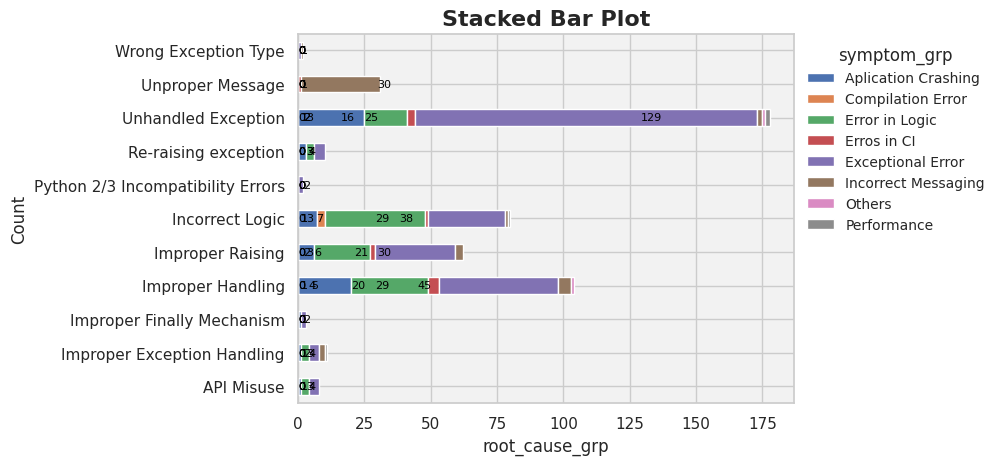

In [83]:
plot_stacked_bar(df_stacked_rq4, x_col='root_cause_grp', y_col='symptom_grp', value_col='Count')

#### Fixes vs Root Causes

In [60]:
df_msr.columns

Index(['author', 'type', 'issue_number', 'commit_msg', 'author_name',
       'author_date', 'merge', 'issue_labels', 'url_issue', 'has_buggy',
       'exception_bug', 'symptom', 'root_cause', 'fix', 'has_smell',
       'has_test in_fix', 'symptom_adj', 'symptom_map', 'symptom_grp',
       'root_cause_adj', 'root_cause_map', 'root_cause_grp', 'fix_adj',
       'fix_map', 'fix_grp'],
      dtype='object')

In [62]:
df_stacked_rq5 = df_msr.groupby(by=['root_cause_grp', 'fix_grp']).size().reset_index(name='Count')

In [63]:
df_stacked_rq5.head(5)

,root_cause_grp,fix_grp,Count
0,API Misuse,Import with a exception handling code,1
1,API Misuse,Improve raising conditions,2
2,API Misuse,Improve the exception handling block,5
3,Improper Exception Handling,Handle a exception,2
4,Improper Exception Handling,Improve raising conditions,2


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_stacked_bar(df, x_col, y_col, value_col):
    # Pivot the DataFrame to have 'x_col' as index, 'y_col' as columns, and 'value_col' as values
    pivot_df = df.pivot(index=x_col, columns=y_col, values=value_col).fillna(0)

    # Create a custom color palette
    custom_palette = sns.color_palette("husl", len(df[y_col].unique()))

    # Create a stacked bar plot using Seaborn with a gray background
    sns.set(style="whitegrid", rc={"axes.facecolor": "#f2f2f2"})
    plt.figure(figsize=(12, 8))
    ax = pivot_df.plot(kind='barh', stacked=True, edgecolor='w')

    # Add labels and title with a smaller font size
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title("Stacked Bar Plot", fontsize=16, fontweight='bold')

    # Display values on the bars with a smaller font size
    for p in ax.patches:
        width = p.get_width()
        plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center', color='black', fontsize=8)

    # Show the legend with a smaller font size
    plt.legend(title=y_col, bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

    # Show the plot
    plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_stacked_bar(df, x_col, y_col, value_col):
    # Pivot the DataFrame to have 'x_col' as index, 'y_col' as columns, and 'value_col' as values
    pivot_df = df.pivot(index=x_col, columns=y_col, values=value_col).fillna(0)

    # Create a custom color palette
    custom_palette = sns.color_palette("husl", len(df[y_col].unique()))

    # Create a stacked bar plot using Seaborn with a gray background
    sns.set(style="whitegrid", rc={"axes.facecolor": "#f2f2f2"})
    plt.figure(figsize=(12, 8))
    ax = pivot_df.plot(kind='barh', stacked=True, edgecolor='w')

    # Add labels and title with a smaller font size
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title("Stacked Bar Plot", fontsize=16, fontweight='bold')

    # Display values on the bars with a smaller font size
    for p in ax.patches:
        width = p.get_width()
        plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center', color='black', fontsize=8)

    # Show the legend with a smaller font size
    plt.legend(title=y_col, bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

    # Show the plot
    plt.show()


<Figure size 1200x800 with 0 Axes>

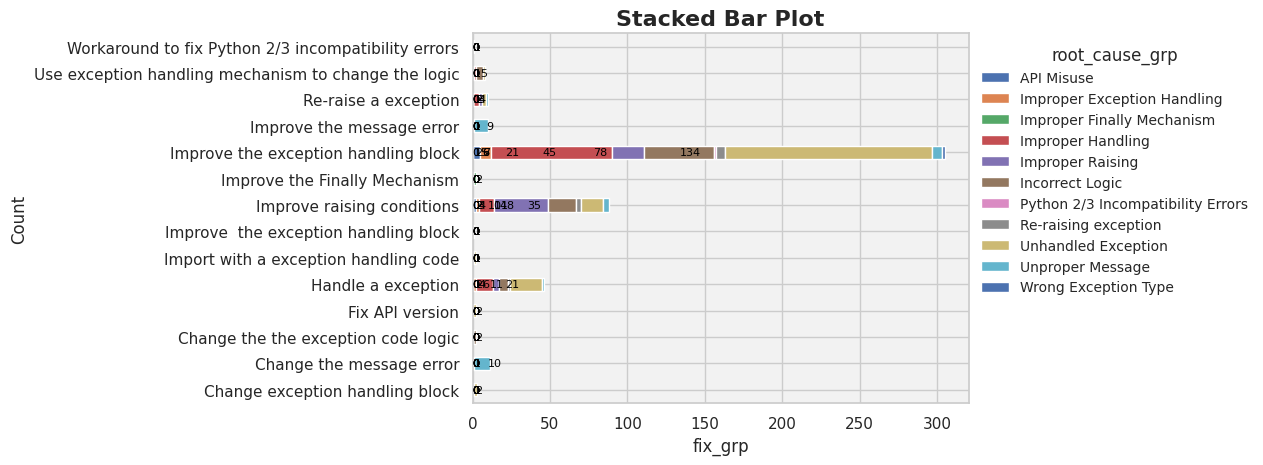

In [78]:
plot_stacked_bar(df_stacked_rq5, x_col='fix_grp', y_col='root_cause_grp', value_col='Count')

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_100_percent_stacked_bar(df, x_col, y_col, value_col):
    # Pivot the DataFrame to have 'x_col' as index, 'y_col' as columns, and 'value_col' as values
    pivot_df = df.pivot(index=x_col, columns=y_col, values=value_col)

    # Normalize the values along each row to get percentages
    pivot_df_percentage = (pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100).round(2)

    #pivot_df_percentage.loc[:, (pivot_df_percentage != 0).any(axis=0)]

    # Create a custom color palette
    custom_palette = sns.color_palette("husl", len(df[y_col].unique()))

    # Create a 100% stacked bar plot using Seaborn with a gray background
    sns.set(style="whitegrid", rc={"axes.facecolor": "#f2f2f2", "legend.frameon": False})
    plt.figure(figsize=(12, 8))
    ax = pivot_df_percentage.plot(kind='barh', stacked=True, edgecolor='w')

    # Add labels and title with a smaller font size
    plt.xlabel("Percentage", fontsize=12)
    plt.ylabel(x_col, fontsize=12)
    plt.title("100% Stacked Bar Plot", fontsize=16, fontweight='bold')

    # Display percentage values on the bars with a smaller font size
    for p in ax.patches:
        width = p.get_width()
        plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha='left', va='center', color='black', fontsize=8)

    # Show the legend with a smaller font size
    plt.legend(title=y_col, bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

    # Show the plot
    plt.show()

<Figure size 1200x800 with 0 Axes>

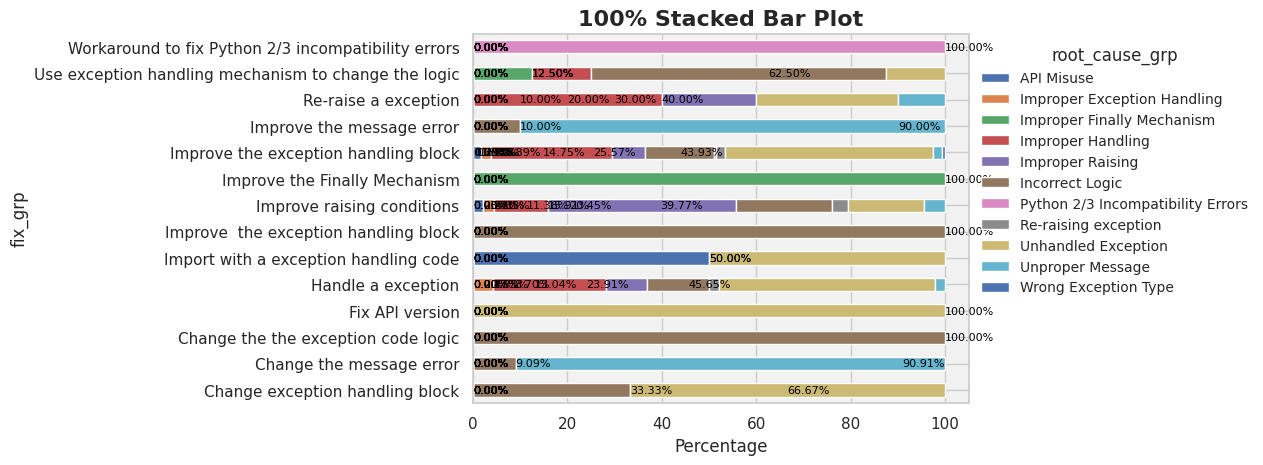

In [147]:
plot_100_percent_stacked_bar(df_stacked_rq5, x_col='fix_grp', y_col='root_cause_grp', value_col='Count')

In [156]:
df_stacked_rq5 = df_msr.groupby(by=['symptom_grp', 'root_cause_grp']).size().reset_index(name='Count')

In [157]:
df_stacked_rq5.head(5)

,symptom_grp,root_cause_grp,Count
0,Aplication Crashing,API Misuse,1
1,Aplication Crashing,Improper Exception Handling,1
2,Aplication Crashing,Improper Finally Mechanism,1
3,Aplication Crashing,Improper Handling,20
4,Aplication Crashing,Improper Raising,6


In [160]:
pivot_df = df_stacked_rq5.pivot(index='root_cause_grp', columns='symptom_grp', values='Count') 

# Normalize the values along each row to get percentages
pivot_df_percentage = (pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100).round(2)

In [161]:
pivot_df_percentage.reset_index()

symptom_grp,root_cause_grp,Aplication Crashing,Compilation Error,Error in Logic,Erros in CI,Exceptional Error,Incorrect Messaging,Others,Performance
0,API Misuse,12.50,NaN,37.50,NaN,50.00,NaN,NaN,NaN
1,Improper Exception Handling,9.09,NaN,27.27,NaN,36.36,18.18,NaN,9.09
2,Improper Finally Mechanism,33.33,NaN,NaN,NaN,66.67,NaN,NaN,NaN
3,Improper Handling,19.23,NaN,27.88,3.85,43.27,4.81,0.96,NaN
4,Improper Raising,9.68,NaN,33.87,3.23,48.39,4.84,NaN,NaN
5,Incorrect Logic,8.75,3.75,47.50,1.25,36.25,1.25,NaN,1.25
6,Python 2/3 Incompatibility Errors,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN
7,Re-raising exception,30.00,NaN,30.00,NaN,40.00,NaN,NaN,NaN
8,Unhandled Exception,14.04,NaN,8.99,1.69,72.47,1.12,0.56,1.12
9,Unproper Message,NaN,NaN,NaN,3.23,NaN,96.77,NaN,NaN


In [162]:
pivot_df_percentage.to_csv("files/root_vs_symptoms.csv")

#### EH Fixes and Anti-Patterns

In [254]:
df_patterns = pd.read_csv("files/fixes-msr.csv")

In [255]:
df_patterns.shape

(372, 23)

In [256]:
df_patterns.head(5)

,author,index,project,commit_fix,url_issue,repo_url,file,function,n_try_pass,n_generic_except,...,n_captures_broad_raise,n_bare_raise_finally,has_smell,exists_anti_pattern,anti_pattern_add,anti_pattern_added_name,anti_pattern_removed,anti_pattern_rem_name,fix_to_only_rem_anti_pattern,comments
0,2,312,pandas,89ad14ddd49287dfed1b4586be2d2f8a3d723868,https://github.com/pandas-dev/pandas/issues/2971,https://github.com/pandas-dev/pandas,2,29,3,5,...,0,0,9,Y,Y,Bare Raise Block,N,NaN,N,NaN
1,2,17,ansible,26fff6f5c32fa4396a8c72872c729b367739499c,https://github.com/ansible/ansible/issues/59527,https://github.com/ansible/ansible,2,32,1,5,...,3,0,9,Y,Y,Too Broad Except,Y,Too Broad Except,N,Marquei que o antipattern foi adicionado e rem...
2,2,337,pipenv,baef2e78a632168bddce0a428969b9f6fb32693c,https://github.com/pypa/pipenv/issues/3017,https://github.com/pypa/pipenv,60,596,20,11,...,3,0,37,N,N,NaN,N,NaN,NaN,Alguns PRs eu marquei em vermelho pelos seguin...
3,2,197,jupyterhub,cb25d29b0bab438b5fd68b92036e0e25134b7ace,https://github.com/jupyterhub/jupyterhub/issue...,https://github.com/jupyterhub/jupyterhub,1,1,0,1,...,0,0,1,Y,Y,Try and Return,Y,Try and Return,N,NaN
4,2,189,ipython,811d52cc05312485b22c67b07d9161eb42c60646,https://github.com/ipython/ipython/issues/5790,https://github.com/ipython/ipython,2,68,4,6,...,0,0,15,Y,Y,Swallowing Exceptions,Y,Swallowing Exceptions,N,NaN


In [257]:
df_patterns.groupby(["exists_anti_pattern", "anti_pattern_add", "anti_pattern_removed"]).size().reset_index()

,exists_anti_pattern,anti_pattern_add,anti_pattern_removed,0
0,N,N,N,153
1,Y,N,Y,95
2,Y,Y,N,63
3,Y,Y,Y,61


In [258]:
df_patterns.groupby(["fix_to_only_rem_anti_pattern"]).size().reset_index()

,fix_to_only_rem_anti_pattern,0
0,N,111
1,Y,4


In [259]:
df_patterns.groupby(["exists_anti_pattern", "anti_pattern_rem_name"]).size().reset_index()

,exists_anti_pattern,anti_pattern_rem_name,0
0,Y,Bare Except Catch Block,2
1,Y,Bare Raise Block,22
2,Y,"Bare Raise Block, Too Broad Except",2
3,Y,Bare except,9
4,Y,"Bare except,Broad exception caught",14
5,Y,Broad exception caught,42
6,Y,Swallowing Exceptions,13
7,Y,Too Broad Except,17
8,Y,"Too Broad Except, Swallowing Exceptions",1
9,Y,Try and Return,1


In [260]:
df_patterns.groupby(["exists_anti_pattern", "anti_pattern_added_name"]).size().reset_index()

,exists_anti_pattern,anti_pattern_added_name,0
0,Y,Bare Except Catch Block,8
1,Y,Bare Raise Block,38
2,Y,"Bare Raise Block, Swallowing Exceptions",2
3,Y,"Bare Raise Block, Swallowing Exceptions, Bare ...",1
4,Y,"Bare Raise Block, Too Broad Except",4
5,Y,Bare except,12
6,Y,Broad exception caught,10
7,Y,Swallowing Exceptions,19
8,Y,"Swallowing Exceptions, Bare Raise Block",2
9,Y,"Swallowing Exceptions, Too Broad Except",1


In [266]:
result_df = pd.merge(df_msr, df_patterns, left_on=['project', 'hash'], right_on=['project', 'commit_fix'], how='inner')

In [269]:
result_df.anti_pattern_added_name.unique()

array(['Swallowing Exceptions', nan, 'Bare Raise Block, Too Broad Except',
       'Bare Except Catch Block', 'Bare Raise Block', 'Too Broad Except',
       'Try and Return', 'Bare except',
       'Bare Raise Block, Swallowing Exceptions',
       'Swallowing Exceptions, Bare Raise Block',
       'Bare Raise Block, Swallowing Exceptions, Bare Except Catch Block',
       'Too Broad Except, Swallowing Exceptions',
       'Broad exception caught',
       'Swallowing Exceptions, Too Broad Except',
       'too-many-nested-blocks',
       'Too Broad Except, Bare Except Catch Block'], dtype=object)

In [270]:
result_df.anti_pattern_rem_name.unique()

array([nan, 'Bare except,Broad exception caught',
       'Broad exception caught', 'too-many-nested-blocks',
       'Swallowing Exceptions',
       'too-many-nested-blocks,Bare except,Broad exception caught',
       'Bare Except Catch Block', 'Bare Raise Block',
       'too-many-nested-blocks,Bare except,Broad exception caught,Bare raise block',
       'Too Broad Except', 'Bare Raise Block, Too Broad Except',
       'Try and Return', 'too-many-nested-blocks,Bare except',
       'Bare except', 'too-many-nested-blocks,Broad exception caught',
       'Too Broad Except, Swallowing Exceptions',
       'too-many-nested-blocks,lost-exception,Bare except,Broad exception caught',
       'too-many-nested-blocks,Broad exception caught,Bare raise block'],
      dtype=object)

In [337]:
result_df['v_anti_pattern_modif_name'] = result_df['anti_pattern_added_name'] + ', ' + result_df['anti_pattern_rem_name']

result_df['v_anti_pattern_added_name'] = result_df['anti_pattern_added_name'].str.strip().split(',')
result_df['v_anti_pattern_rem_name'] = result_df['anti_pattern_rem_name'].str.strip().str.split(',')
result_df['v_anti_pattern_modif_name'] = result_df['v_anti_pattern_modif_name'].str.strip().str.split(',')

In [338]:
result_df[result_df['anti_pattern_removed'] == 'Y']['v_anti_pattern_rem_name'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [307]:
df_explode = result_df.explode('v_anti_pattern_modif_name').reset_index(drop=True)

In [308]:
df_explode.columns

Index(['project', 'hash', 'author_x', 'type', 'issue_number', 'commit_msg',
       'author_name', 'author_date', 'merge', 'issue_labels', 'url_issue_x',
       'has_buggy', 'exception_bug', 'symptom', 'root_cause', 'fix',
       'has_smell_x', 'has_test in_fix', 'symptom_adj', 'symptom_map',
       'symptom_grp', 'root_cause_adj', 'root_cause_map', 'root_cause_grp',
       'fix_adj', 'fix_map', 'fix_grp', 'author_y', 'index', 'commit_fix',
       'url_issue_y', 'repo_url', 'file', 'function', 'n_try_pass',
       'n_generic_except', 'n_nested_try', 'n_bare_except',
       'n_captures_misplaced_bare_raise', 'n_captures_broad_raise',
       'n_bare_raise_finally', 'has_smell_y', 'exists_anti_pattern',
       'anti_pattern_add', 'anti_pattern_added_name', 'anti_pattern_removed',
       'anti_pattern_rem_name', 'fix_to_only_rem_anti_pattern', 'comments',
       'v_anti_pattern_modif_name', 'v_anti_pattern_added_name',
       'v_anti_pattern_rem_name'],
      dtype='object')

In [315]:
df_grp = df_explode.groupby(["fix_grp", "v_anti_pattern_modif_name"]).size().reset_index(name="Count").sort_values("Count", ascending=False)

In [316]:
df_grp

,fix_grp,v_anti_pattern_modif_name,Count
38,Improve the exception handling block,Broad exception caught,13
28,Improve the exception handling block,Bare Raise Block,11
32,Improve the exception handling block,Too Broad Except,11
37,Improve the exception handling block,Bare except,11
36,Improve the exception handling block,Bare Raise Block,9
40,Improve the exception handling block,Too Broad Except,7
31,Improve the exception handling block,Swallowing Exceptions,6
34,Improve the exception handling block,too-many-nested-blocks,6
39,Improve the exception handling block,Swallowing Exceptions,6
29,Improve the exception handling block,Bare except,5


In [329]:
df_piv = df_grp.pivot(index="fix_grp", columns="v_anti_pattern_modif_name", values="Count").reset_index()
df_piv

v_anti_pattern_modif_name,fix_grp,Bare Except Catch Block,Bare Raise Block,Bare except,Broad exception caught,Swallowing Exceptions,Too Broad Except,Try and Return,too-many-nested-blocks,Bare Except Catch Block,Bare Raise Block,Bare except,Broad exception caught,Swallowing Exceptions,Too Broad Except,Try and Return,lost-exception
0,Change exception handling block,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
1,Change the message error,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Change the the exception code logic,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Fix API version,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
4,Handle a exception,NaN,1.0,NaN,NaN,5.0,3.0,NaN,1.0,NaN,1.0,2.0,1.0,3.0,3.0,NaN,NaN
5,Improve raising conditions,1.0,4.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN
6,Improve the Finally Mechanism,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
7,Improve the exception handling block,2.0,11.0,5.0,2.0,6.0,11.0,1.0,6.0,2.0,9.0,11.0,13.0,6.0,7.0,1.0,1.0
8,Improve the message error,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
9,Re-raise a exception,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [330]:
df_piv.to_csv("files/rq6.csv")

In [331]:
df_explode.groupby(["v_anti_pattern_modif_name"]).size().reset_index(name="Count").sort_values("Count", ascending=False)

,v_anti_pattern_modif_name,Count
5,Too Broad Except,19
1,Bare Raise Block,18
11,Broad exception caught,18
9,Bare Raise Block,17
10,Bare except,15
13,Too Broad Except,15
4,Swallowing Exceptions,12
7,too-many-nested-blocks,9
12,Swallowing Exceptions,9
2,Bare except,6


In [333]:
df_explode.groupby(["v_anti_pattern_modif_name"]).size().reset_index(name="Count").sort_values("Count", ascending=False).to_csv("files/rq6_count.csv")